# The first part of the assignment, IDS 2020-2021
In this Jupiter notebook, please, document your results and the way you have obtained them. Please use the _Python environment_ provided at the beginning of the course. In addition to the _Jupiter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupiter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification and simplification. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    3. Ningyuan Chen 350169

## Preprocessing of the Dataset (5 points)
 Carry out the following preprocessing steps before starting the analysis:
 - Select 90% of dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the new generated dataset (which contains 90% of the data) to "sampled_data".
 - <font color='red'>Important!</font>  Export your *sampled_data* dataset and submit it with your assignment solution.
 - If it is not otherwise mentioned, you should always use your below created *sampled_data* as input for the questions.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
random_seed = 350169

# read the csv file and construct the dataframe with first row as header
raw_dataset = pd.read_csv(r'./dataset.csv', header=0)
# construct a random state with seed of my id
random_state = np.random.RandomState(350169)
# select 90%
sampled_data = raw_dataset.sample(frac=0.9, random_state=random_state)
# export to file
sampled_data.to_csv(r'./sampled_data.csv')

## Question 1 - Insights into the Data (15 points):

   (a)  Generate a dataset by removing those rows of the sampled_data dataset for which the value of "SurfaceR" is equal or bigger than 50000. Let's call this data set "new_sampled_data".

In [3]:
new_sampled_data = sampled_data[sampled_data['SurfaceR'] < 50000]
print("Old shape:", sampled_data.shape)
print("New shape:", new_sampled_data.shape)
new_sampled_data['SurfaceR'].describe()

Old shape: (170, 22)
New shape: (164, 22)


count      164.000000
mean      3576.402439
std       7344.297307
min         30.000000
25%        300.000000
50%        600.000000
75%       2700.000000
max      40000.000000
Name: SurfaceR, dtype: float64

   (b)  Use a boxplot to find and remove the outliers from "SurfaceR". Note that based on the boxplot the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers. Let's call the dataset after removing the outliers "cleaned_data". Now you should  have three datasets (sampled_data, new_sampled_data, and cleaned_data). 

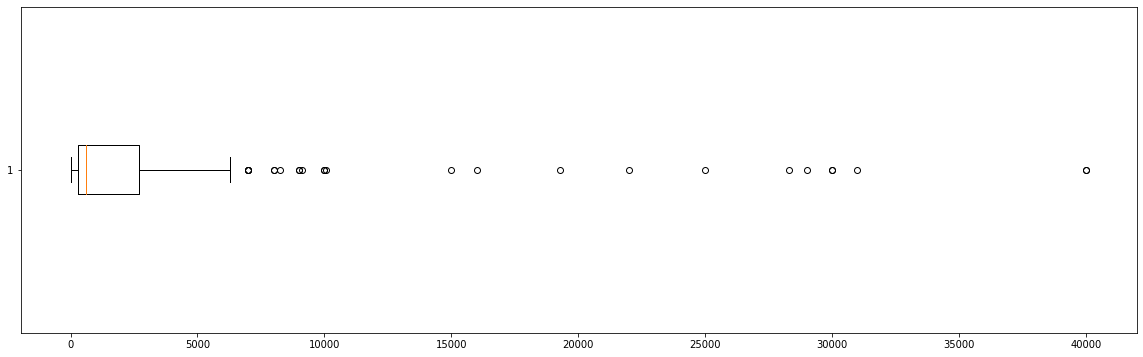

Lower whisker: 30.0
Upper_whisker: 6300.0
Old shape: (164, 22)
New shape: (139, 22)


In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
boxplot_lines = plt.boxplot(new_sampled_data['SurfaceR'], vert=False)
plt.show()
# Get upper and lower whiskers by reading the y-values
# of the corresponding lines in the plot
lower_whisker = boxplot_lines["caps"][0].get_xdata()[0]
upper_whisker = boxplot_lines["caps"][1].get_xdata()[0]
print("Lower whisker:", lower_whisker)
print("Upper_whisker:", upper_whisker)
# Remove outliers = points exceeding whiskers
# i.e. keep points not exceeding whiskers
cleaned_data = new_sampled_data[new_sampled_data["SurfaceR"] >= lower_whisker]
cleaned_data = cleaned_data[cleaned_data["SurfaceR"] <= upper_whisker]
print("Old shape:", new_sampled_data.shape)
print("New shape:", cleaned_data.shape)

   (c) Compare basic statistical features of "SurfaceR" (median, mean, and mode, standard deviation, variance) in the new_sampled_data and cleaned_data datasets.    Interpret the differences for these statistical values between the cleaned_data and new_sampled_data datasets. Explain why the statistics of these two datasets are different.

In [202]:
from statistics import median, mean, mode, stdev, variance

#Calculate different metrics for both datasets
print("\t", "new_sampled_data\t\t", "cleaned_data", end="\t\n")
for metric, metric_name in [
                            [median, "Median"],
                            [mean, "Mean"],
                            [mode, "Mode"],
                            [stdev, "Standard deviation"],
                            [variance, "Variance"],
                           ]:
    print(metric_name+":")
    for dataset in [new_sampled_data, cleaned_data]:
        print("\t{value:<20}".format(value=metric(dataset["SurfaceR"])), end="\t")
    print()

	 new_sampled_data		 cleaned_data	
Median:
	600.0               		450                 	
Mean:
	3576.4024390243903  		1090.1438848920864  	
Mode:
	300                 		300                 	
Standard deviation:
	7344.297306691347   		1266.1461472135193  	
Variance:
	53938702.92907377   		1603126.0661036388  	


In [203]:
# Calculate Minimum and Maximum for both datasets
for metric, metric_name in [
                            [np.min, "Minimum"],
                            [np.max, "Maximum"],
                           ]:
    print(metric_name+":")
    for dataset in [new_sampled_data, cleaned_data]:
        print(metric(dataset["SurfaceR"]), end="\t")
    print()

# Calculate the number of outliers below and above the whiskers
n_below_lower_whisker = (new_sampled_data["SurfaceR"] < lower_whisker).sum()
n_above_upper_whisker = (new_sampled_data["SurfaceR"] > upper_whisker).sum()
print("{} data points below lower whisker of {}".format(n_below_lower_whisker, lower_whisker))
print("{} data points above upper whisker of {}".format(n_above_upper_whisker, upper_whisker))

Minimum:
30	30	
Maximum:
40000	6300	
0 data points below lower whisker of 30.0
25 data points above upper whisker of 6300.0


<font color="green">
Explanation:

The above tells no data points below the lower whisker are removed, 25 data points above the upper whisker are removed. Furthermore, the maximum value of SurfaceR for the outliers greatly exceeds the upper whisker (40,000 vs 6,300). Therefore, the **mean** and **median** are higher for new_sampled_data than for cleaned data.
    
Furthermore, removing the outliers decreases the overall range the data points lie in. Therefore, the **variance** (and consequently, the **standard deviation**) is higher for new_sampled_data than for cleaned_data.
    
Lastly, the **mode** describes the most common value. This value is more likely to lie in a region where a lot of data points lie, i.e. not in the region of outliers. Therefore, the **mode** is not affected by removing outliers and stays the same for both new_sampled_data and cleaned_data.</font>

### Basic Visualization (10 points)
(d) Visualize mean and median of "SurfaceR" in the cleaned dataset. Specify the "Surroundings3" values for which the mean and median of "SurfaceR" is maximal and for which it is minimal.

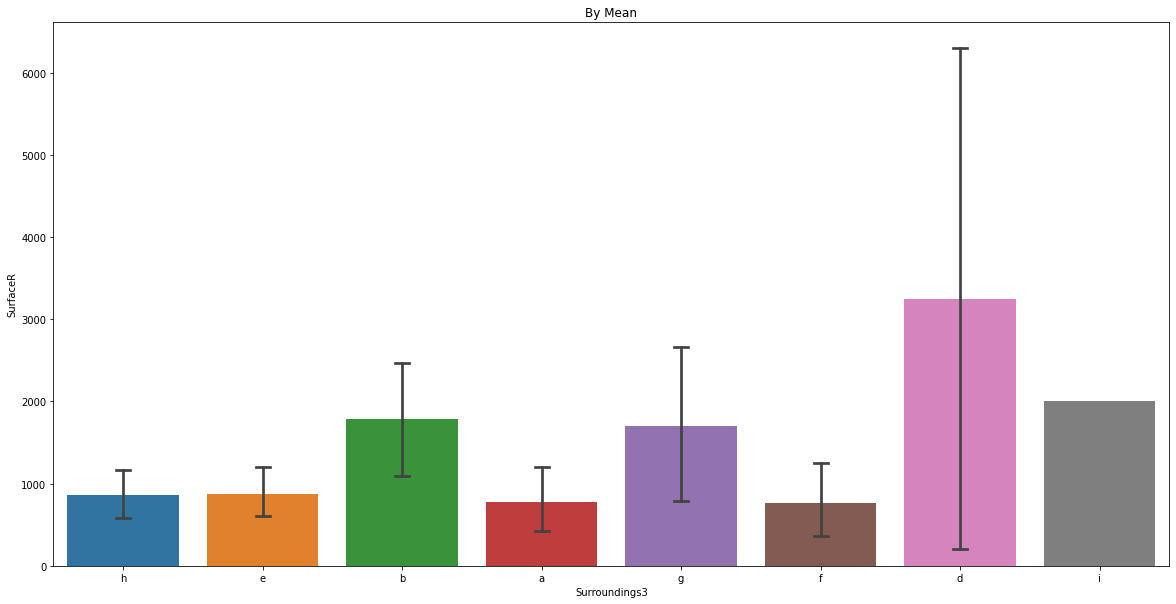

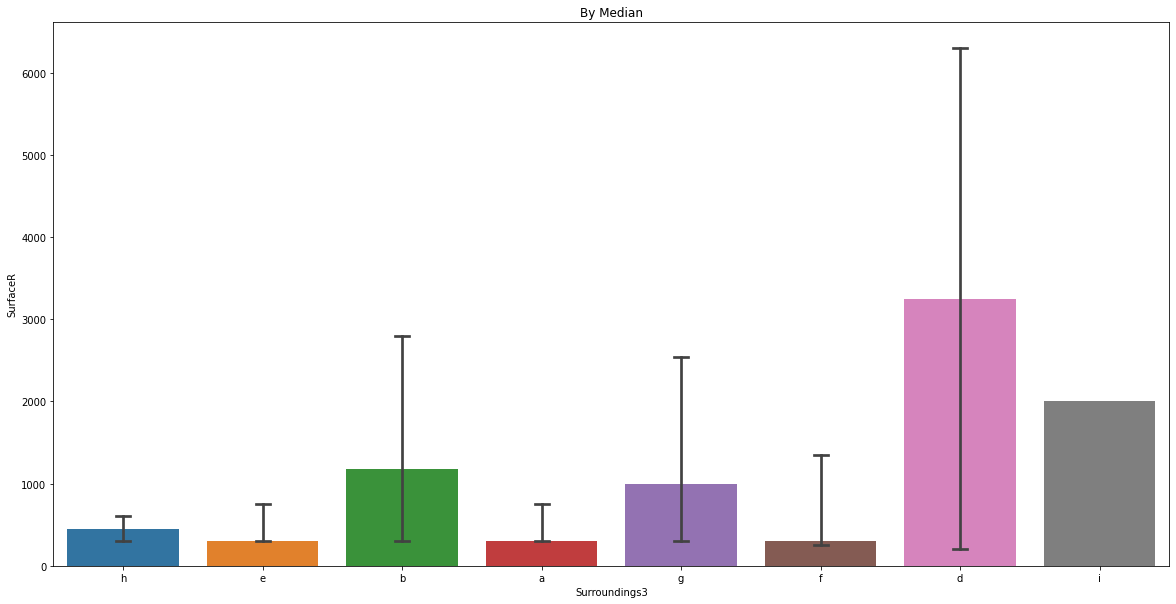

In [204]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.barplot(x='Surroundings3', y='SurfaceR', data=cleaned_data[cleaned_data.Surroundings3 != 'None'], estimator=np.mean, capsize=.1)
plt.title("By Mean")
plt.show()
plt.figure(figsize=(20,10))
sns.barplot(x='Surroundings3', y='SurfaceR', data=cleaned_data[cleaned_data.Surroundings3 != 'None'], estimator=np.median, capsize=.1)
plt.title("By Median")
plt.show()

<font color="green">
Explanation:

We can visually recognize that the maximum average of both mean and median of SurfaceR is on d, whereas the minimum also for both statistics is on e.</font>

   (e) Plot the distribution of "SurfaceR" in the new_sampled_data and cleaned_data datasets.

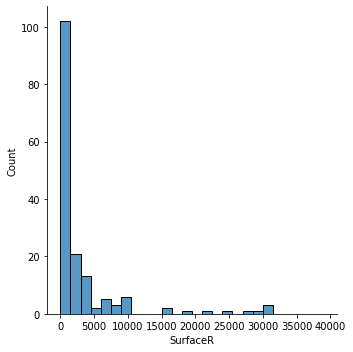

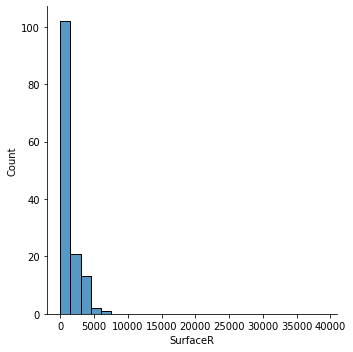

In [205]:
import seaborn as sns

sns.displot(data=new_sampled_data,
            x="SurfaceR",
            bins=np.arange(start=0,
                           stop=np.max(new_sampled_data['SurfaceR']),
                           step=1500))

plt.show()
sns.displot(data=cleaned_data,
            x="SurfaceR",
            bins=np.arange(start=0,
                           stop=np.max(new_sampled_data['SurfaceR']),
                           step=1500))
plt.show()

   (f) Explore the distribution of "SurfaceR" and "AcessR" together in the new_sampled_data and cleaned_data datasets. Specify the ranges of "SurfaceR" and "AcessR" for which the frequency of the data is the highest.

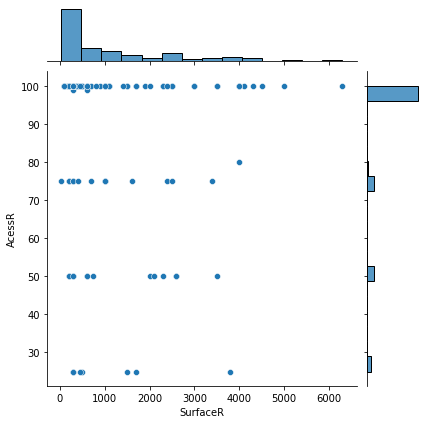

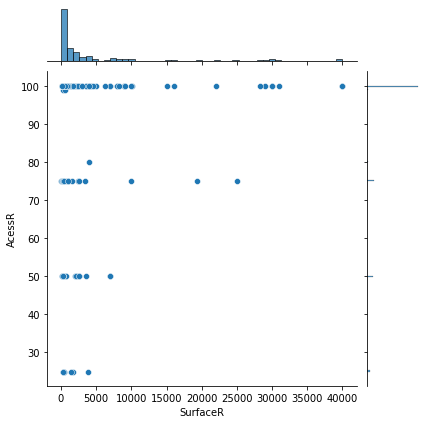

In [206]:
sns.jointplot(x='SurfaceR', y='AcessR', data=cleaned_data, kind="scatter")
sns.jointplot(x='SurfaceR', y='AcessR', data=new_sampled_data, kind="scatter")

<font color="green">Explanation:

* For both datasets, the highest frequency happens when AcessR=100.
* For cleaned_data, SurfaceR is in the range 0 to over 6,000
* For new_sampled_data, SurfaceR is in the range 0 to 40,000</font>

## Question 2 - Decision Trees (15 points):

   (a) Add a categorical column "number_frogs" to the new_sampled_data which indicate the number of different frogs in each region (row). For example, if in a row we have:
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 0, "Common newt" = 0, and "Great crested newt" = 0, then "number_frogs" = 'two'.
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 1, "Common newt" = 1, and "Great crested newt" = 0, then "number_frogs" = 'four'.

In [207]:
new_sampled_data['number_frogs'] = new_sampled_data.apply(
    lambda row: row['Green frogs']+row['Brown frogs']+
    row['Common toad']+row['Fire-bellied toad']+
    row['Tree frog']+row['Common newt']+row['Great crested newt'],
    axis=1)
# check the range of the values
print(new_sampled_data['number_frogs'].unique())
# array([3, 6, 5, 1, 4, 2, 7, 0])
number_to_word = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven']
new_sampled_data['number_frogs'] = new_sampled_data.apply(lambda row: number_to_word[row['number_frogs']], axis=1)
new_sampled_data.head()

[3 6 5 1 4 2 7 0]


ID  SurfaceR  NumberR TypeR  VegetationR Surroundings1 Surroundings2  \
87    88       300        1     i            1             b             h   
80    81       600        2     a            1             a             h   
185  186       300        1     i            2             f             h   
3      4       300        1     d            0             e             h   
62    63     19300        2     a            1             b             e   

    Surroundings3  UseR  FishingR  ...  PollutionR   ShoreR  Green frogs  \
87              h     0         0  ...           0  natural            0   
80              e     3         1  ...           0  natural            1   
185             b     0         0  ...           0  natural            1   
3               b     3         4  ...           0  natural            0   
62              a     3         3  ...           0  natural            1   

     Brown frogs Common toad  Fire-bellied toad  Tree frog  Common newt  \
87             1           1                  0          1            0   
80             1           1                  0          1            1   
185            1           1                  1          0            1   
3              0           1                  0          0            0   
62             1           1                  1          1            0   

     Great crested newt  number_frogs  
87                    0         three  
80                    1           six  
185                   0          five  
3                     0           one  
62                    0          five  

[5 rows x 23 columns]

   (b) In the new dataset (created in Section 'a'), consider "TypeR", "VegetationR", "Surroundings1", "Surroundings2", "Surroundings3" as    the descriptive features and "number_frogs" as the target feature. Generate two decision trees. Let's call them "tree1" and "tree2". In tree1 set the minimum number of samples for splitting to 15 and in tree2 set the minimum number of samples for splitting to 1. Create both decision trees based on entropy.

In [208]:
from p_decision_tree.DecisionTree import DecisionTree

q2_data = new_sampled_data.copy(deep=True)
descriptive_features = ['TypeR', 'VegetationR',
                        'Surroundings1', 'Surroundings2',
                        'Surroundings3']
target_feature = 'number_frogs'

# Convert all the columns to string
q2_str = q2_data.copy()
for column in q2_str.columns:
    q2_str[column]= q2_str[column].astype(str)

df_descriptive = q2_str[descriptive_features].values
df_target = q2_str[target_feature].values

# Decision Tree1
tree1 = DecisionTree(df_descriptive.tolist(),
                     descriptive_features,
                     df_target.tolist(),
                     "entropy")
tree1.id3(0 ,15)

tree2 = DecisionTree(df_descriptive.tolist(),
                     descriptive_features,
                     df_target.tolist(),
                     "entropy")
tree2.id3(0 ,1)

dot1 = tree1.print_visualTree(render=True)
dot2 = tree2.print_visualTree(render=True)
# see the output PDF

   (c) Consider tree1. What is the best attribute (based on entropy) for splitting the tree in the second round of ID3 regarding the value of the attribute chosen in the first round of ID3?    

<font color="green">
Explanation:

TypeR was chosen at the first round of ID3, it can be seen in the generated decision tree (see visualTree1.gv.pdf). Based on the value of TypeR, different attributes are best for splitting the tree (based on highest information gain / entropy difference) in the second step:

* TypeR = a or TypeR = j: Surroundings3
* TypeR = h: Surroundings2
* TypeR = b, d, e, g, i: No further splits, as the splitting condition of a minimum number of samples of 15 was not fulfilled.
* TypeR = c, f did not occur in the sampled dataset.
</font>

   (d) Compare tree1 and tree2 in terms of the possibility of overfitting and the complexity of the decision trees.

<font color="green">
Explanation:

Visually, it is immediately clear that tree2 is of considerably higher complexity than tree1, as it has a lot more branches and leaves, consequently. Tree2 is therefore also more prone to overfitting, as the number of leaves is close to the number of samples used to train the model.

This happens because the minimum number of samples for splitting is 1 for tree2. Therefore, ID3 can find a tree where each leaf contains really few samples. Tree2 is thus able to remember the training data by heart (by creating a leaf for every unique sample), i.e. it overfits.

As the minimum number of samples for splitting is 15 for tree1, it is of lower complexity and less likely to overfit.
</font>

## Question 3 - Regression (14 points):

For this question (Q3), create and use a restricted dataset by removing the columns "ID", "NumberR", "Surrounding1", "Surrounding2", "Surrounding3", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt" from the sampled_data.

In this question, we consider "Green frogs" and "Brown frogs" to be potential target features, while all other features are potential descriptive features.

In [209]:
q3_data = sampled_data.drop(
    ["ID", "NumberR", "Surroundings1", "Surroundings2", "Surroundings3", "Common toad", "Fire-bellied toad",
     "Tree frog", "Common newt", "Great crested newt"], axis=1)
target_features = ['Green frogs', 'Brown frogs']
q3_output = q3_data[target_features]
q3_input = q3_data.drop(target_features, axis=1)

print("Unique value of TypeR", q3_input["TypeR"].unique())
print("Unique value of ShoreR", q3_input["ShoreR"].unique())
q3_input.head(2)

Unique value of TypeR ['i' 'a' 'd' 'h' 'g' 'b' 'j' 'e']
Unique value of ShoreR ['natural' 'concrete']


SurfaceR TypeR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  \
87        300     i            1     0         0     100              5   
135    115000     a            0     3         4     100              0   

     BuildingR  PollutionR   ShoreR  
87           5           0  natural  
135          1           0  natural

   (a) Which features are suitable as input for logistic regression? Which would need to be modified first? Explain your answers.

In [210]:
q3_input.dtypes

SurfaceR          int64
TypeR            object
VegetationR       int64
UseR              int64
FishingR          int64
AcessR            int64
RoadDistanceR     int64
BuildingR         int64
PollutionR        int64
ShoreR           object
dtype: object

<font color="green">Explanation: 

**TypeR** and **ShoreR** need to be modified, all other features can be used as they are.

As TypeR and ShoreR are categorical & nominal features, they need to be transformed into numerical features first. As the other categorical features (VegetationR, UseR, FishingR, PollutionR) are ordinal (low to high) and already encoded as (sorted) numbers, they do not need to be modified.
</font>

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows. 

<font color="green">Explanation:

For TypeR, there exist more than 2 possible values that can not be sorted. Thus, one-hot encoding is used to encode the feature numerically to avoid introducing an ordering by accident.

For ShoreR, there only exist two possible values (natural and concrete). Thus, a binary feature "ShoreConcrete" (true or false) suffices.
</font>

In [243]:
# Define descriptive features and convert categorical variable into indicator variables
q3_data_mod = pd.get_dummies(q3_data)

# Remove ShoreR_natural column as binary ShoreR_concrete feature suffices
q3_data_mod.drop(["ShoreR_natural"], axis=1, inplace=True)

# Remove the outliers
Q1 = np.percentile(new_sampled_data['SurfaceR'], 25, interpolation = 'midpoint')
Q3 = np.percentile(new_sampled_data['SurfaceR'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
q3_data_mod = q3_data_mod[q3_data_mod['SurfaceR'] < upper_whisker]

q3_data_mod.head(2)

SurfaceR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  BuildingR  \
87       300            1     0         0     100              5          5   
80       600            1     3         1     100              1          0   

    PollutionR  Green frogs  Brown frogs  TypeR_a  TypeR_b  TypeR_d  TypeR_e  \
87           0            0            1        0        0        0        0   
80           0            1            1        1        0        0        0   

    TypeR_g  TypeR_h  TypeR_i  TypeR_j  ShoreR_concrete  
87        0        0        1        0                0  
80        0        0        0        0                0

<font color="green">Additional Explanation:

Removing the outliers should stabilize the training of the model.</font>

(c) We want to predict the presence of green frogs and brown frogs in the habitat, using a distinct logistic regression classifier for each frog type. 

Consider the set of features available in this question's unmodified data set (that is before Q3b). To get an overview of the data, choose and present some basic visualization as discussed in the lectures (e.g.  scatter matrix, scatter plots, charts, etc.). Based on this visualization, for each frog type choose the 4 most promising descriptive features to predict the presence of that frog type in the habitat. 

Explain your strategy and choices.

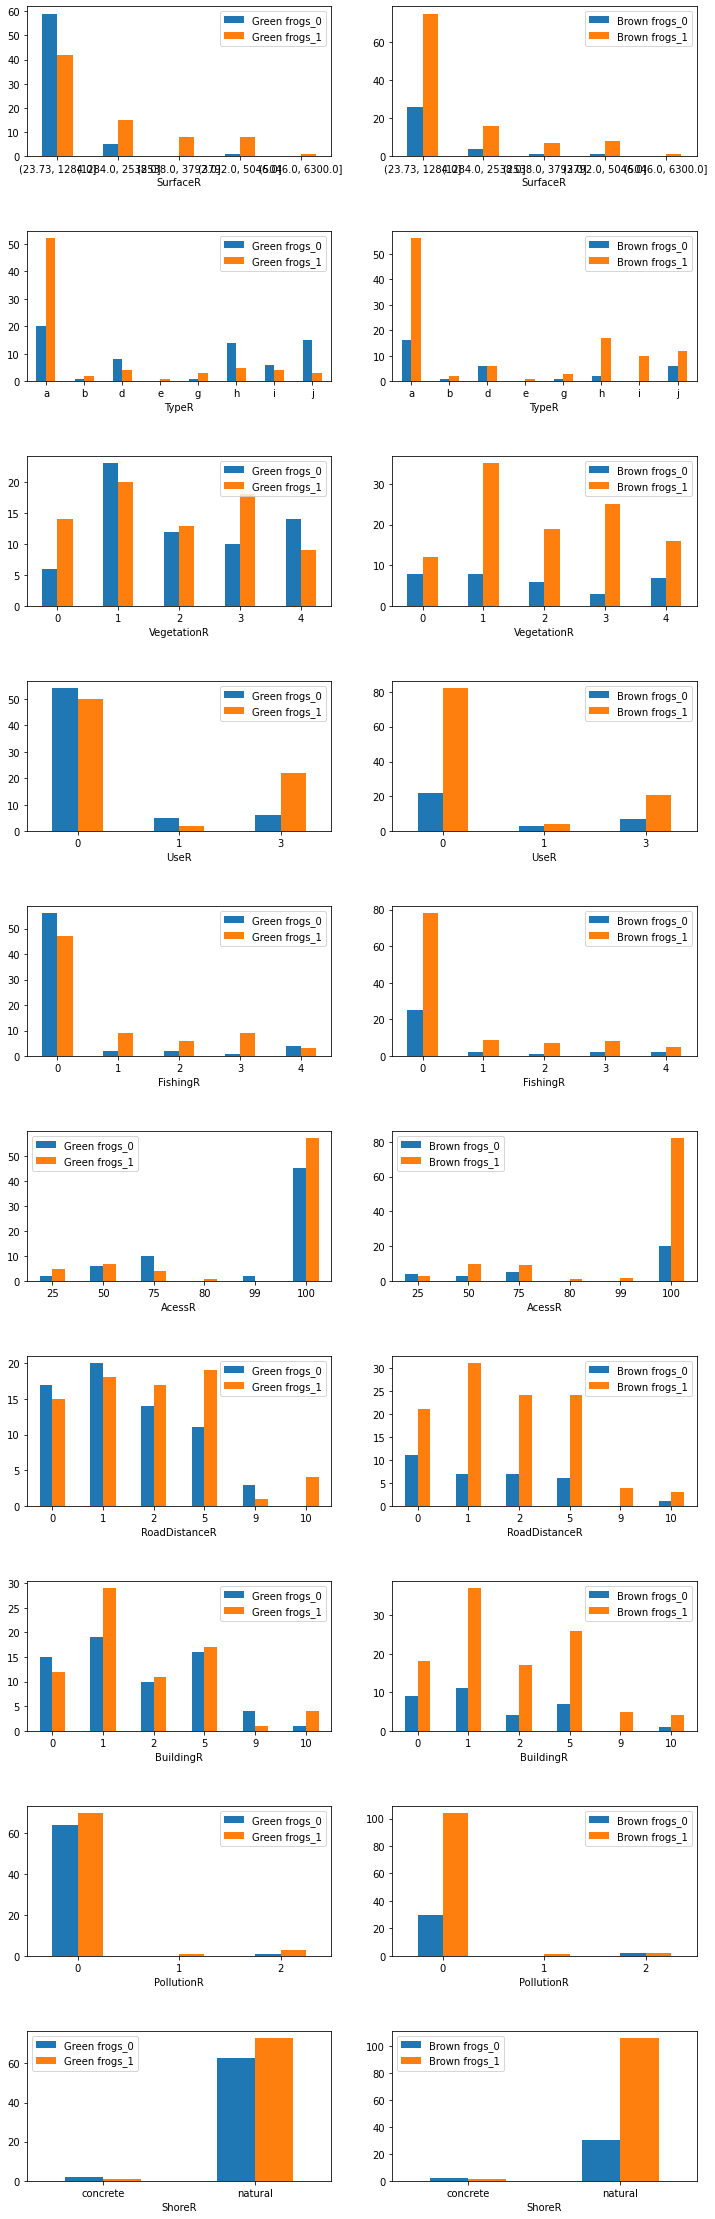

In [212]:
plot_data = q3_data_mod.copy(deep=True)

n_features = len(q3_data_mod.columns[:-2])

# Bin data for SurfaceR
# Data of other features already consists of a suffiently low number of unique values
plot_data["SurfaceR"] = pd.cut(plot_data["SurfaceR"], bins=5)

# Bar plots
fig, axes = plt.subplots(nrows=n_features, ncols=2, figsize=(12, n_features*4))
for plt_col, frogtype in enumerate(["Green frogs", "Brown frogs"]):
    for plt_row, feature in enumerate(plot_data.columns[:-2]):
        (pd.get_dummies(plot_data[[feature,frogtype]], columns=[frogtype])
           .groupby(feature).sum()
           .plot.bar(ax=axes[plt_row, plt_col], rot=0))

# Leave more space between subplots
plt.subplots_adjust(hspace=0.5)

Explanation:

- The features ShoreR and PollutionR each only have one unique value for almost all instances. Thus, as they practically do not change, they are not useful for predicting and can be dropped.
- For all other features, the bar plots above are used for feature selection. For both green and brown frogs and for each feature, a feature is chosen if the distribution of number of frogs changes (significantly) as the feature increases (or, in the categorical case, changes).
- The chosen features are listed in the dictionary below.

In [252]:
selected_features = {
             "Green frogs": ["SurfaceR", "TypeR", "UseR", "FishingR"],
             "Brown frogs": ["SurfaceR", "TypeR", "FishingR", "BuildingR"]
            }

   (d) For both frog types, train a logistic regression classifier to predict the presence of that frog type in the habitat. Use the descriptive features as chosen in Q3c. Apply the modification from Q3b if needed.

In [253]:
from sklearn.linear_model import LogisticRegression
import copy

features = copy.deepcopy(selected_features)
# In the feature dictionary, replace the feature name TypeR with the one-hot encoded feature names
for frogtype in ["Green frogs", "Brown frogs"]:
    i = features[frogtype].index("TypeR")
    features[frogtype][i:i+1] = list(q3_data_mod.columns[10:-1])

# Train linear regression models
models = {}
for frogtype in ["Green frogs", "Brown frogs"]:
    models[frogtype] = LogisticRegression(solver="liblinear",
                                          multi_class="ovr")
    models[frogtype].fit(q3_data_mod[features[frogtype]],
                        q3_data_mod[frogtype])

   (e) For each of the two trained classifiers compute and print the confusion matrix.

In [245]:
from sklearn.metrics import confusion_matrix

for frogtype in ["Green frogs", "Brown frogs"]:
    print(confusion_matrix(y_true=q3_data_mod[frogtype],
                           y_pred=models[frogtype].predict(q3_data_mod[features[frogtype]])))

[[40 25]
 [17 57]]
[[  3  29]
 [  1 106]]


(f) Based on the information computed in Q3 so far, interpret and evaluate the two models and compare them. Why are they similar/different? Would you recommend the models and why (not)? How do you think the applied methods could be improved to get better results?

<font color="green">Explanation:

While the model for brown frogs has a higher accuracy, it is the worse model of the two, as it just predicts "brown frog is present" for (almost) every instant. This is likely a result of the fact that the data for brown frogs is imbalanced, i.e. brown frogs are present in most habitats.
Therefore the models are not really similar, as only the model for green frogs has the potential to be useful in practice.

We would definitely not recommend the model for brown frogs, as it is just as bad as a simple baseline model. The model for green frogs could be used, but it may be worth to investigate other methods to achieve higher accuracy, as the current accuracy (on the train set!) is a bit lacking. One of the models advantages though is its interpretability.

To improve the results of the models they could be trained on subsets of the data consisting of the same number of positive and negative samples each, thus accounting for the imbalance. Another way to potentially improve the models is to normalize the input features. Notably, the values of SurfaceR are a lot higher ( O(1000) ) than those of the other features used ( O(1) ).</font>

## Question 4 - Support Vector Machines (8 points):

For this question (Q4), restrict your data set to the same features as in Q3. Similar to Q3, we want to train two distinct classifiers predicting the presence of green frogs and brown frogs in the habitat. 

In this question, we will use SVMs instead of logistic regression. In the following, consider *Green frogs* and *Brown frogs* to be potential target features, while all other features are potential descriptive features.

In [246]:
q4_data = sampled_data.drop(
    ["ID", "NumberR", "Surroundings1", "Surroundings2", "Surroundings3", "Common toad", "Fire-bellied toad",
     "Tree frog", "Common newt", "Great crested newt"], axis=1)

q4_output = q3_data[target_features]
q4_input = q3_data.drop(target_features, axis=1)
# Print the input dataset
q4_input.head(2)

SurfaceR TypeR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  \
87        300     i            1     0         0     100              5   
135    115000     a            0     3         4     100              0   

     BuildingR  PollutionR   ShoreR  
87           5           0  natural  
135          1           0  natural

   (a) Which of the potential descriptive features are suitable as an input for SVMs and which need to be modified first? Modify the data as needed and provide a brief explanation. Print the first two data rows of the modified data set.

In [247]:
# One-Hot Encoding for TypeR and ShoreR
q4_data_mod = pd.get_dummies(q4_data)

q4_data_mod.drop(["ShoreR_natural"], axis=1, inplace=True)

# Remove the outliers
Q1 = np.percentile(new_sampled_data['SurfaceR'], 25, interpolation = 'midpoint')
Q3 = np.percentile(new_sampled_data['SurfaceR'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
q4_data_mod = q4_data_mod[q4_data_mod['SurfaceR'] < upper_whisker]

q4_data_mod.head(2)

SurfaceR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  BuildingR  \
87       300            1     0         0     100              5          5   
80       600            1     3         1     100              1          0   

    PollutionR  Green frogs  Brown frogs  TypeR_a  TypeR_b  TypeR_d  TypeR_e  \
87           0            0            1        0        0        0        0   
80           0            1            1        1        0        0        0   

    TypeR_g  TypeR_h  TypeR_i  TypeR_j  ShoreR_concrete  
87        0        0        1        0                0  
80        0        0        0        0                0

<font color="green">
Explanation:

This explanation was copied from the Q3.

**TypeR** and **ShoreR** need to be modified, all other features can be used as they are.

As TypeR and ShoreR are categorical & nominal features, they need to be transformed into numerical features first. As the other categorical features (VegetationR, UseR, FishingR, PollutionR) are ordinal (low to high) and already encoded as (sorted) numbers, they do not need to be modified.

For TypeR, there exist more than 2 possible values that can not be sorted. Thus, one-hot encoding is used to encode the feature numerically to avoid introducing an ordering by accident.

For ShoreR, there only exist two possible values (natural and concrete). Thus, a binary feature "ShoreConcrete" (true or false) suffices.
</font>

<font color="green">Additional Explanation:

Removing the outliers should stabilize the training of the model.</font>

   (b) For each frog type, consider the same set of 4 descriptive features as chosen in Q3 c). Generate for both target features a training and test set based on all data rows (for example, consider the sampling strategies as explained in the lecture) of the restricted data set. Briefly explain and motivate the choice of the sampling strategy as well as the size of the training and test set.

In [254]:
from sklearn.model_selection import train_test_split

q4_train_data, q4_test_data = {}, {}
for frogtype in ["Green frogs", "Brown frogs"]:
    q4_train_data[frogtype], q4_test_data[frogtype] = train_test_split(q4_data_mod,
                                                                       stratify=q4_data_mod[frogtype],
                                                                       test_size=0.25,
                                                                       random_state=random_state)

<font color="green">
Explanation:

For brown frogs, the dataset is really imbalanced between positive and negative instances. Thus, stratified sampling is chosen as a sampling strategy to avoid the train or test set being devoid of negative samples by chance. 25% of the data is chosen as a test set. This value was chosen as the majority of the data was supposed to be used for training, while the test set should not be too small as the number of overall samples is small.
</font>

   (c) Use the training set to train 4 different SVMs (2 per frog type) with different parameter combinations. Use at least two distinct values for the parameters *kernel* and *C*.

*Hint: depending on the size of the training data and chosen parameters, training the SVMs may take some time.*

In [255]:
from sklearn.svm import SVC

# dict in which models for different frog types will be stored
models = {}
for frogtype in ["Green frogs", "Brown frogs"]:
    models[frogtype] = [] # list in which both models for each frog type will be stored
    models[frogtype].append(SVC(kernel="linear",
                                C=1.))
    models[frogtype].append(SVC(kernel="poly",
                                degree=3,
                                C=2.))
    # Fit
    for model in models[frogtype]:
        model.fit(q4_train_data[frogtype][features[frogtype]],
                 q4_train_data[frogtype][frogtype])

   (d) Compute and print the mean accuracy and the classification report of the trained SVMs with respect to the test set (see instruction for examples).

In [256]:
from sklearn.metrics import accuracy_score, classification_report

for frogtype in ["Green frogs", "Brown frogs"]:
    # First choice of parameters
    y_pred_test = models[frogtype][0].predict(q4_test_data[frogtype][features[frogtype]])
    print(frogtype, ",", "linear kernel", ",", "C=1")
    print("Test acurracy = {}\n".format(accuracy_score(y_true=q4_test_data[frogtype][frogtype],
                                                       y_pred=y_pred_test)))
    print(classification_report(y_true=q4_test_data[frogtype][frogtype],
                                y_pred=y_pred_test))
    print()
    
    # Second choice of parameters
    y_pred_test = models[frogtype][1].predict(q4_test_data[frogtype][features[frogtype]])
    print(frogtype, ",", "polynomial kernel", ",", "C=2")
    print("Test acurracy = {}\n".format(accuracy_score(y_true=q4_test_data[frogtype][frogtype],
                                                       y_pred=y_pred_test)))
    print(classification_report(y_true=q4_test_data[frogtype][frogtype],
                                y_pred=y_pred_test))
    print()

Green frogs , linear kernel , C=1
Test acurracy = 0.6

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        16
           1       0.63      0.63      0.63        19

    accuracy                           0.60        35
   macro avg       0.60      0.60      0.60        35
weighted avg       0.60      0.60      0.60        35


Green frogs , polynomial kernel , C=2
Test acurracy = 0.6285714285714286

              precision    recall  f1-score   support

           0       0.56      0.88      0.68        16
           1       0.80      0.42      0.55        19

    accuracy                           0.63        35
   macro avg       0.68      0.65      0.62        35
weighted avg       0.69      0.63      0.61        35


Brown frogs , linear kernel , C=1
Test acurracy = 0.7714285714285715

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.77      1.00   

   (e) Based on the information computed in Q4 so far, interpret and evaluate the 4 SVMs and compare them. Why are they similar/different? Would you recommend using these SVMs and why (not)?

In [257]:
# Compute test accuracies for simple baseline models
# that always predict that a frog is present
for frogtype in ["Green frogs", "Brown frogs"]:
    baseline = q4_test_data[frogtype][frogtype].sum() / q4_test_data[frogtype][frogtype].shape[0]
    print ("Baseline test accuracy for {}: {}".format(frogtype, baseline))

Baseline test accuracy for Green frogs: 0.5428571428571428
Baseline test accuracy for Brown frogs: 0.7714285714285715


<font color="green">
Explanation:

The SVMs for **brown frogs** suffer from the same problem as the regression models: They do not surpass the accuracy of a simple baseline model (0.77) that always predicts that a brown frog is present. Thus, we would not recommend to use them.

In contrast, the SVMs for **green frogs** surpass the baseline accuracy, i.e. they produce predictions that are actually useful. Based on accurary, the polynomial kernel SVM with C=2 seems to work slightly better than the linear kernel SVM with C=1. Interestingly, the polynomial kernel SVM for green frogs seems biased towards predicting 0 (see high precision ( = low number of false negatives) for zero and high recall ( = low number of false negatives) for 1). Before we would recommend to use the model though, the accuracy needs to be improved, as 62% on the test set is a bit lacking.
</font>

## Question 5 - Neural Networks (15 points)
In this question consider the sampled_data, which is the dataset that you have created in the *Preprocessing of Dataset* section. The target features are the *different frogs*.

   (a) What are the possible inputs of your network?
   
     - Give the number of possible values of the different categorical inputs.
     - Give the number of possible input patterns for the categorical data..

In [5]:
# Loop over all categorical features
for feature in ["TypeR", "VegetationR", "Surroundings1", "Surroundings2", "Surroundings3",
                "UseR", "FishingR", "PollutionR", "ShoreR"]:
    # Compute and print the number of possible values (= unique values) for the given feature
    n_unique = sampled_data[feature].unique().shape[0]
    print("Feature {feature:<18} has {n_unique:>6} unique values".format(feature=feature, n_unique=n_unique))
    #Compute and print the number of possible input patterns for the given feature
    print('The number of possible input patterns is', pow(2, n_unique))
    print()

Feature TypeR              has      8 unique values
The number of possible input patterns is 256

Feature VegetationR        has      5 unique values
The number of possible input patterns is 32

Feature Surroundings1      has      8 unique values
The number of possible input patterns is 256

Feature Surroundings2      has      7 unique values
The number of possible input patterns is 128

Feature Surroundings3      has      8 unique values
The number of possible input patterns is 256

Feature UseR               has      3 unique values
The number of possible input patterns is 8

Feature FishingR           has      5 unique values
The number of possible input patterns is 32

Feature PollutionR         has      3 unique values
The number of possible input patterns is 8

Feature ShoreR             has      2 unique values
The number of possible input patterns is 4



<font color="green">Explanation: 

See the output of the code above. Note that "low-to-high"-features are also regarded as categorical.
</font>

   (b) Choose one categorical feature and two non-categorical features as input features. Create a data set with those features and the target columns (different frogs). Name this data set *NN_data*.

In [6]:
# Use the categorical feature TypeR
# Use the non-categorical features AcessR, BuildingR
NN_data = sampled_data[["TypeR", "AcessR", "BuildingR"] # Descriptive features
                       + sampled_data.columns[-7:].tolist() # Target features (different frogs)
                      ].copy(deep=True) # Copy to avoid reference to original sampled_data
NN_data.head(2)

TypeR  AcessR  BuildingR  Green frogs  Brown frogs  Common toad  \
87      i     100          5            0            1            1   
135     a     100          1            1            1            0   

     Fire-bellied toad  Tree frog  Common newt  Great crested newt  
87                   0          1            0                   0  
135                  0          0            0                   0

   (c) Convert the features that need to be converted using One-Hot-Encoding. Explain why you need (not) to convert these features. Name the data set *NN_data_encoded*.

<font color="green">
Explanation:

As TypeR is a nominal categorical feature, it needs to be one-hot encoded. The non-categorical features do not need to be converted. 
</font>

In [7]:
# One-Hot Encoding for TypeR
NN_data_encoded = pd.get_dummies(NN_data, columns=["TypeR"])

# Re-order elements so the target features are the last columns
columns = NN_data_encoded.columns.tolist()
columns = columns[:2] + columns[9:] + columns[2:9]
NN_data_encoded = NN_data_encoded[columns]
NN_data_encoded[:5]

AcessR  BuildingR  TypeR_a  TypeR_b  TypeR_d  TypeR_e  TypeR_g  TypeR_h  \
87      100          5        0        0        0        0        0        0   
135     100          1        1        0        0        0        0        0   
80      100          0        1        0        0        0        0        0   
185     100          5        0        0        0        0        0        0   
3        25          0        0        0        1        0        0        0   

     TypeR_i  TypeR_j  Green frogs  Brown frogs  Common toad  \
87         1        0            0            1            1   
135        0        0            1            1            0   
80         0        0            1            1            1   
185        1        0            1            1            1   
3          0        0            0            0            1   

     Fire-bellied toad  Tree frog  Common newt  Great crested newt  
87                   0          1            0                   0  
135                  0          0            0                   0  
80                   0          1            1                   1  
185                  1          0            1                   0  
3                    0          0            0                   0

   (d) Create a training and test set with 90% of the rows of your *NN_data_encoded* data set for training and 10% as test data set. Name them *train_NN* and *test_NN*

In [8]:
from sklearn.model_selection import train_test_split

train_NN, test_NN = train_test_split(NN_data_encoded, test_size=0.1, random_state=random_state)
print("Shape of each:", train_NN.shape, test_NN.shape)

Shape of each: (153, 17) (17, 17)


   (e) Train two different Neural Networks, one with a linear activation function and one with a non-linear activation function. All other settings stay default. Give the accuracy of each Neural Network for the training and test set (*train_NN* and *test_NN*. Which activation function seems to be better?

In [9]:
from sklearn.neural_network import MLPClassifier
from numpy.random import seed
seed(random_seed) # for reproducibility

def compute_individual_accuracy(y_true, y_pred, columns=train_NN.columns[-7:].to_list()):
    """
    Compute the accuracy per feature instead of overall accuracy where every feature of an
    instance has to be predicted right (as it would be done in, e.g.,
    sklearn.metrics.accuracy_score).
    """
    #accuracy = 1 - number of wrongly predicted instances / number of instances
    #computed for each target feature, therefore axis=0 in sum
    accuracy =  1 - np.sum(np.abs((y_pred - y_true)), axis=0) / np.prod(y_pred.shape[0])
    average_accuracy = accuracy.mean()
    for acc, feature in zip(accuracy, columns):
        print("Accuracy for {feature}: {acc}".format(feature=feature, acc=acc))
    print("Average accuracy: {avg_acc}".format(avg_acc=average_accuracy))

# Assign descriptive and target features
descriptive_features = train_NN.columns[:-7]
target_features = train_NN.columns[-7:]
print("Descriptive features:", list(descriptive_features))
print("Target features:", list(target_features))

# (linear activation function):
model_lin = MLPClassifier(activation="identity",
                          random_state=random_seed) # reproducible results (needs to be int to
                                                    # work, hence the previously defined 
                                                    # random_state variable is not used here)
model_lin.fit(train_NN[descriptive_features],
              train_NN[target_features])

# Predict target values
y_pred_lin_train = model_lin.predict(train_NN[descriptive_features])
y_pred_lin_test = model_lin.predict(test_NN[descriptive_features])

# Compute and print accuracies for the train and test data
print("\nTrain data:")
compute_individual_accuracy(y_true=train_NN[target_features].to_numpy(),
                            y_pred=y_pred_lin_train)
print("\nTest data:")
compute_individual_accuracy(y_true=test_NN[target_features].to_numpy(),
                            y_pred=y_pred_lin_test)

Descriptive features: ['AcessR', 'BuildingR', 'TypeR_a', 'TypeR_b', 'TypeR_d', 'TypeR_e', 'TypeR_g', 'TypeR_h', 'TypeR_i', 'TypeR_j']
Target features: ['Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt']

Train data:
Accuracy for Green frogs: 0.7581699346405228
Accuracy for Brown frogs: 0.7777777777777778
Accuracy for Common toad: 0.6993464052287581
Accuracy for Fire-bellied toad: 0.7058823529411764
Accuracy for Tree frog: 0.6535947712418301
Accuracy for Common newt: 0.7058823529411764
Accuracy for Great crested newt: 0.8823529411764706
Average accuracy: 0.7404295051353874

Test data:
Accuracy for Green frogs: 0.5882352941176471
Accuracy for Brown frogs: 0.7647058823529411
Accuracy for Common toad: 0.7647058823529411
Accuracy for Fire-bellied toad: 0.7058823529411764
Accuracy for Tree frog: 0.8235294117647058
Accuracy for Common newt: 0.7058823529411764
Accuracy for Great crested newt: 1.0
Average accuracy: 0.7647058823529

In [10]:
# (non-linear activation function):
model_relu = MLPClassifier(activation="relu",
                           random_state=random_seed) #reproducible results
model_relu.fit(train_NN[descriptive_features], train_NN[target_features])

# Predict target values
y_pred_relu_train = model_relu.predict(train_NN[descriptive_features])
y_pred_relu_test = model_relu.predict(test_NN[descriptive_features])

# Compute and print accuracies for the train and test data
print("\nTrain data:")
compute_individual_accuracy(y_true=train_NN[target_features].to_numpy(),
                            y_pred=y_pred_relu_train)
print("\nTest data:")
compute_individual_accuracy(y_true=test_NN[target_features].to_numpy(),
                            y_pred=y_pred_relu_test)


Train data:
Accuracy for Green frogs: 0.7254901960784313
Accuracy for Brown frogs: 0.7647058823529411
Accuracy for Common toad: 0.6405228758169934
Accuracy for Fire-bellied toad: 0.6993464052287581
Accuracy for Tree frog: 0.6209150326797386
Accuracy for Common newt: 0.6993464052287581
Accuracy for Great crested newt: 0.8823529411764706
Average accuracy: 0.7189542483660131

Test data:
Accuracy for Green frogs: 0.5882352941176471
Accuracy for Brown frogs: 0.8235294117647058
Accuracy for Common toad: 0.7647058823529411
Accuracy for Fire-bellied toad: 0.7058823529411764
Accuracy for Tree frog: 0.8235294117647058
Accuracy for Common newt: 0.7058823529411764
Accuracy for Great crested newt: 1.0
Average accuracy: 0.7731092436974789


<font color="green">Explanation:

The linear activation function and ReLU seem to perform about the same on the test data. While the train accuracy of the linear activation function is higher than the train accuracy for ReLU, the test accuracy is slightly higher for ReLU. Thus, for part f, ReLU is chosen as activation.
</font>

   (f) Based on your result of (e) train 2 more Neural Networks with different settings (change at least 4 parameters (2 each)). Explain your parameters and the choice of the activation function. Evaluate the different Neural Networks with your test set by giving the accuracy. Try to increase the accuracy and analyse the factors that prohibit better accuracy.

In [11]:
# Model number 3 uses more & layer with more units (default is (100,))
# and more regularization (default is 0.0001)
model_3 = MLPClassifier(activation="relu",
                        hidden_layer_sizes=(150,)*3,
                        alpha=0.001,
                        random_state=random_seed) # reproducible results
model_3.fit(train_NN[descriptive_features],
            train_NN[target_features])

# Predict target values
y_pred_3_test = model_3.predict(test_NN[descriptive_features])

# Compute and print accuracies for the test data
print("\nTest data:")
compute_individual_accuracy(y_true=test_NN[target_features].to_numpy(),
                            y_pred=y_pred_3_test)


# Model number 4 uses a considerably lower sample size (default is min(n_samples))
# and a different optimizer (default is ADAM)
model_4 = MLPClassifier(activation="relu",
                        batch_size=8,
                        solver="sgd",
                        random_state=random_seed) # reproducible results
model_4.fit(train_NN[descriptive_features],
            train_NN[target_features])

# Predict target values
y_pred_4_test = model_4.predict(test_NN[descriptive_features])

# Compute and print accuracies for the test data
print("\nTest data:")
compute_individual_accuracy(y_true=test_NN[target_features].to_numpy(),
                            y_pred=y_pred_4_test)


Test data:
Accuracy for Green frogs: 0.5294117647058824
Accuracy for Brown frogs: 0.7647058823529411
Accuracy for Common toad: 0.7647058823529411
Accuracy for Fire-bellied toad: 0.7058823529411764
Accuracy for Tree frog: 0.8235294117647058
Accuracy for Common newt: 0.7058823529411764
Accuracy for Great crested newt: 1.0
Average accuracy: 0.7563025210084033

Test data:
Accuracy for Green frogs: 0.6470588235294117
Accuracy for Brown frogs: 0.8235294117647058
Accuracy for Common toad: 0.7647058823529411
Accuracy for Fire-bellied toad: 0.7058823529411764
Accuracy for Tree frog: 0.8235294117647058
Accuracy for Common newt: 0.7058823529411764
Accuracy for Great crested newt: 1.0
Average accuracy: 0.7815126050420168


<font color="green">
Explanation:

ReLU is chosen as activation function because it had slighlty higher test accuracy (than a linear activation function) in part f.

For model_3, more layers and more units are chosen to give the model more predictive power. To combat additional overfitting that might be introduced by increasing the number of parameters, the L2 regularization coefficient is increased simultaneously.

For model_4, a smaller batch size is chosen in the hope that it provides the model with better generalization capabilities to unseen data. We chose SGD over ADAM because it empirically resulted in better accuracy.

Judging by the test accuracy, model_4 seems to perform best out of all tested models.

</font>


## Question 6 - Evaluation (10 Points)

   (a) Consider two models of question 5 of your choice with the respective datasets (training and test data).

- Create training and test data for 3-fold cross validation.

In [92]:
from sklearn.model_selection import KFold
n_splits = 3
kf3 = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
#q6_input = NN_data_encoded.drop(target_features, axis=1) # descriptive features
#q6_output = NN_data_encoded[target_features]             # target features

train_data_list = [] # lists where train/test data will be saved in, fold is specified
test_data_list = []  # by choosing the index of the list

for train_index, test_index in kf3.split(NN_data_encoded):
    train_data_list.append(NN_data_encoded.iloc[train_index])
    test_data_list.append(NN_data_encoded.iloc[test_index])

# Display e.g. the first fold (train data)
display(train_data_list[0])

AcessR  BuildingR  TypeR_a  TypeR_b  TypeR_d  TypeR_e  TypeR_g  TypeR_h  \
87      100          5        0        0        0        0        0        0   
135     100          1        1        0        0        0        0        0   
185     100          5        0        0        0        0        0        0   
3        25          0        0        0        1        0        0        0   
62       75          0        1        0        0        0        0        0   
..      ...        ...      ...      ...      ...      ...      ...      ...   
70      100         10        0        0        0        0        1        0   
72       75          0        1        0        0        0        0        0   
144     100          1        1        0        0        0        0        0   
158     100          2        0        0        1        0        0        0   
103     100          2        1        0        0        0        0        0   

     TypeR_i  TypeR_j  Green frogs  Brown frogs  Common toad  \
87         1        0            0            1            1   
135        0        0            1            1            0   
185        1        0            1            1            1   
3          0        0            0            0            1   
62         0        0            1            1            1   
..       ...      ...          ...          ...          ...   
70         0        0            1            1            0   
72         0        0            0            0            1   
144        0        0            1            1            0   
158        0        0            1            1            1   
103        0        0            1            1            1   

     Fire-bellied toad  Tree frog  Common newt  Great crested newt  
87                   0          1            0                   0  
135                  0          0            0                   0  
185                  1          0            1                   0  
3                    0          0            0                   0  
62                   1          1            0                   0  
..                 ...        ...          ...                 ...  
70                   1          0            0                   0  
72                   0          0            0                   0  
144                  0          0            0                   0  
158                  1          1            1                   0  
103                  1          1            1                   1  

[113 rows x 17 columns]

- Print confusion matrices on the training data and the cell-by-cell summation of the results.

In [94]:
from sklearn.metrics import multilabel_confusion_matrix

# Fit two models, each on all three folds, so fit a total of six models and
# save the predicted values for all train and test folds
y_pred_train_list = {"model_lin": [], "model_4": []} # predicted labels will be stored in those
y_pred_test_list = {"model_lin": [], "model_4": []} # lists, in which the index specifies the fold
for fold in range(n_splits):
    # Train models (model_lin and model_4)
    # This will erase previously computed weights and re-train with new initialization
    model_lin.fit(train_data_list[fold][descriptive_features],
                  train_data_list[fold][target_features])
    model_4.fit(train_data_list[fold][descriptive_features],
                train_data_list[fold][target_features])
    # Make predictions on train data
    y_pred_train_list["model_lin"].append(
        model_lin.predict(train_data_list[fold][descriptive_features]))
    y_pred_train_list["model_4"].append(
        model_4.predict(train_data_list[fold][descriptive_features]))
    # Make predictions on test data
    y_pred_test_list["model_lin"].append(
        model_lin.predict(test_data_list[fold][descriptive_features]))
    y_pred_test_list["model_4"].append(
        model_4.predict(test_data_list[fold][descriptive_features]))

# Compute and print the confusion matrix for both models and every fold of the train data
# as well as the cell-by-cell summation
cell_by_cell = {} # save cell-by-cell sums for both models in this dicionary
for model in ["model_lin", "model_4"]:
    for fold in range(n_splits):
        print("\n{model}, fold {fold}".format(model=model, fold=fold+1))
        cf_matrix = multilabel_confusion_matrix(y_true = train_data_list[fold][target_features],
                                                y_pred = y_pred_train_list[model][fold])
        print(cf_matrix)
        # Add confusion matrix to cell-by-cell summation
        if fold==0: cell_by_cell[model]  = cf_matrix # use assign operator for first fold,
        else:      cell_by_cell[model] += cf_matrix # assign and add for every fold after
    print("\n{model}, cell-by-cell summation".format(model=model))
    print(cell_by_cell[model])


model_lin, fold 1
[[[ 26  20]
  [  6  61]]

 [[  2  25]
  [  0  86]]

 [[  3  35]
  [  3  72]]

 [[ 80   1]
  [ 31   1]]

 [[ 73   2]
  [ 33   5]]

 [[ 78   0]
  [ 34   1]]

 [[101   0]
  [ 12   0]]]

model_lin, fold 2
[[[35 17]
  [10 51]]

 [[ 2 24]
  [ 0 87]]

 [[11 25]
  [ 6 71]]

 [[79  2]
  [32  0]]

 [[70  1]
  [38  4]]

 [[75  5]
  [32  1]]

 [[98  0]
  [15  0]]]

model_lin, fold 3
[[[  0  42]
  [  0  72]]

 [[  0  25]
  [  0  89]]

 [[  0  40]
  [  0  74]]

 [[ 57  19]
  [ 28  10]]

 [[ 69   1]
  [ 42   2]]

 [[ 80   0]
  [ 34   0]]

 [[105   0]
  [  9   0]]]

model_lin, cell-by-cell summation
[[[ 61  79]
  [ 16 184]]

 [[  4  74]
  [  0 262]]

 [[ 14 100]
  [  9 217]]

 [[216  22]
  [ 91  11]]

 [[212   4]
  [113  11]]

 [[233   5]
  [100   2]]

 [[304   0]
  [ 36   0]]]

model_4, fold 1
[[[  0  46]
  [  0  67]]

 [[  0  27]
  [  0  86]]

 [[  0  38]
  [  0  75]]

 [[ 81   0]
  [ 32   0]]

 [[ 75   0]
  [ 38   0]]

 [[ 78   0]
  [ 35   0]]

 [[101   0]
  [ 12   0]]]

model_4,

- Print the cell-by-cell summation of the confusion matrices on the test data.

In [95]:
# Compute and print the confusion matrix for both models and every fold of the train data
# as well as the cell-by-cell summation
cell_by_cell = {} # save cell-by-cell sums for both models in this dicionary
for model in ["model_lin", "model_4"]:
    for fold in range(n_splits):
        print("\n{model}, fold {fold}".format(model=model, fold=fold+1))
        cf_matrix = multilabel_confusion_matrix(y_true = test_data_list[fold][target_features],
                                                y_pred = y_pred_test_list[model][fold])
        print(cf_matrix)
        # Add confusion matrix to cell-by-cell summation
        if fold==0: cell_by_cell[model]  = cf_matrix # use assign operator for first fold,
        else:      cell_by_cell[model] += cf_matrix # assign and add for every fold after
    print("\n{model}, cell-by-cell summation".format(model=model))
    print(cell_by_cell[model])


model_lin, fold 1
[[[13 11]
  [ 5 28]]

 [[ 0 12]
  [ 1 44]]

 [[ 0 19]
  [ 1 37]]

 [[38  0]
  [19  0]]

 [[33  0]
  [23  1]]

 [[41  0]
  [16  0]]

 [[51  0]
  [ 6  0]]]

model_lin, fold 2
[[[ 9  9]
  [12 27]]

 [[ 1 12]
  [ 1 43]]

 [[ 1 20]
  [ 0 36]]

 [[36  2]
  [18  1]]

 [[35  2]
  [17  3]]

 [[34  5]
  [17  1]]

 [[54  0]
  [ 3  0]]]

model_lin, fold 3
[[[ 0 28]
  [ 0 28]]

 [[ 0 14]
  [ 0 42]]

 [[ 0 17]
  [ 0 39]]

 [[32 11]
  [ 8  5]]

 [[38  0]
  [17  1]]

 [[39  0]
  [17  0]]

 [[47  0]
  [ 9  0]]]

model_lin, cell-by-cell summation
[[[ 22  48]
  [ 17  83]]

 [[  1  38]
  [  2 129]]

 [[  1  56]
  [  1 112]]

 [[106  13]
  [ 45   6]]

 [[106   2]
  [ 57   5]]

 [[114   5]
  [ 50   1]]

 [[152   0]
  [ 18   0]]]

model_4, fold 1
[[[ 0 24]
  [ 0 33]]

 [[ 0 12]
  [ 0 45]]

 [[ 0 19]
  [ 0 38]]

 [[38  0]
  [19  0]]

 [[33  0]
  [24  0]]

 [[41  0]
  [16  0]]

 [[51  0]
  [ 6  0]]]

model_4, fold 2
[[[ 0 18]
  [ 0 39]]

 [[ 0 13]
  [ 0 44]]

 [[ 0 21]
  [ 0 36]]

 [[38  0]


- Print the precision, recall and f1-scores on the test data for each fold and model. Give the unaggregated results.

Please note:
We define a positive sample for a frogtype as a sample where that frogtype is present. This means that e.g. for one habitat and green frogs, if a model predicts there are green frogs are present and they are not in reality, it would be counted as a false positive.
This is important for calculating the desired metrics.

In [96]:
def precision(cf):
    """Computes precision of given a 2x2 confusion matrix cf.
       Cases without any TPs and FPs are left as is so they are noticed (returns nan)."""
    return cf[1,1] / (cf[1,1] + cf[0,1])

def recall(cf):
    """Computes recall of a given 2x2 confusion matrix cf.
       Cases without any TPs and FNs are left as is so they are noticed (returns nan)."""
    return cf[1,1] / (cf[1,1] + cf[0,1])

def F1_score(cf):
    """Computes the F1 score of given a 2x2 confusion matrix cf using the previously defined
       functions precision and recall."""
    return 2 * precision(cf) * recall(cf) / (precision(cf)+recall(cf))

# Compute and print all metrics for both models and every fold of the train data
for model in ["model_lin", "model_4"]:
    for fold in range(n_splits):
        print("\n{model}, fold {fold}".format(model=model, fold=fold+1))
        cf_matrix = multilabel_confusion_matrix(y_true = test_data_list[fold][target_features],
                                                y_pred = y_pred_test_list[model][fold])
        # For every metric, loop over sub-matrices (confusion matrices for each feature)
        # and calculate the desired metric.
        # Precision
        print("Precision: ")
        for i in range(cf_matrix.shape[0]):
            print(precision(cf_matrix[i]), end=", " if i!=cf_matrix.shape[0]-1 else "")
        
        # Recall
        print("\nRecall: ")
        for i in range(cf_matrix.shape[0]):
            print(recall(cf_matrix[i]), end=", " if i!=cf_matrix.shape[0]-1 else "")
        
        # F1 score
        print("\nF1 Score: ")
        for i in range(cf_matrix.shape[0]):
            print(recall(cf_matrix[i]), end=", " if i!=cf_matrix.shape[0]-1 else "")
        print()


model_lin, fold 1
Precision: 
0.717948717948718, 0.7857142857142857, 0.6607142857142857, nan, 1.0, nan, nan
Recall: 
0.717948717948718, 0.7857142857142857, 0.6607142857142857, nan, 1.0, nan, nan
F1 Score: 
0.717948717948718, 0.7857142857142857, 0.6607142857142857, nan, 1.0, nan, nan

model_lin, fold 2
Precision: 
0.75, 0.7818181818181819, 0.6428571428571429, 0.3333333333333333, 0.6, 0.16666666666666666, nan
Recall: 
0.75, 0.7818181818181819, 0.6428571428571429, 0.3333333333333333, 0.6, 0.16666666666666666, nan
F1 Score: 
0.75, 0.7818181818181819, 0.6428571428571429, 0.3333333333333333, 0.6, 0.16666666666666666, nan

model_lin, fold 3
Precision: 
0.5, 0.75, 0.6964285714285714, 0.3125, 1.0, nan, nan
Recall: 
0.5, 0.75, 0.6964285714285714, 0.3125, 1.0, nan, nan
F1 Score: 
0.5, 0.75, 0.6964285714285714, 0.3125, 1.0, nan, nan

model_4, fold 1
Precision: 
0.5789473684210527, 0.7894736842105263, 0.6666666666666666, nan, nan, nan, nan
Recall: 
0.5789473684210527, 0.7894736842105263, 0.6666666

- Compute accuracy scores on training and test data (give explicitly the result for each fold).

In [97]:
def accuracy(cf):
    """Computes the accuracy of given a 2x2 confusion matrix."""
    return (cf[0,0] + cf[1,1]) / (cf[0,0] + cf[1,1] + cf[0,1] + cf[1,0])

# Compute and print accuracy for both models and every fold of the train data
for model in ["model_lin", "model_4"]:
    for fold in range(n_splits):
        print("\n{model}, fold {fold}".format(model=model, fold=fold+1))
        # For train and test data, loop over sub-matrices (confusion matrices for each feature)
        # and calculate the accuracy.
        # Train data
        print("Accuracy on train data: ")
        # Compute confusion matrix
        cf_matrix = multilabel_confusion_matrix(y_true = train_data_list[fold][target_features],
                                                y_pred = y_pred_train_list[model][fold])
        for i in range(cf_matrix.shape[0]):
            print(accuracy(cf_matrix[i]), end=", " if i!=cf_matrix.shape[0]-1 else "")
        
        #Test data
        print("\nAccuracy on test data: ")
        # Compute confusion matrix
        cf_matrix = multilabel_confusion_matrix(y_true = test_data_list[fold][target_features],
                                                y_pred = y_pred_test_list[model][fold])
        for i in range(cf_matrix.shape[0]):
            print(accuracy(cf_matrix[i]), end=", " if i!=cf_matrix.shape[0]-1 else "")
        print()


model_lin, fold 1
Accuracy on train data: 
0.7699115044247787, 0.7787610619469026, 0.6637168141592921, 0.7168141592920354, 0.6902654867256637, 0.6991150442477876, 0.8938053097345132
Accuracy on test data: 
0.7192982456140351, 0.7719298245614035, 0.6491228070175439, 0.6666666666666666, 0.5964912280701754, 0.7192982456140351, 0.8947368421052632

model_lin, fold 2
Accuracy on train data: 
0.7610619469026548, 0.7876106194690266, 0.7256637168141593, 0.6991150442477876, 0.6548672566371682, 0.672566371681416, 0.8672566371681416
Accuracy on test data: 
0.631578947368421, 0.7719298245614035, 0.6491228070175439, 0.6491228070175439, 0.6666666666666666, 0.6140350877192983, 0.9473684210526315

model_lin, fold 3
Accuracy on train data: 
0.631578947368421, 0.7807017543859649, 0.6491228070175439, 0.5877192982456141, 0.6228070175438597, 0.7017543859649122, 0.9210526315789473
Accuracy on test data: 
0.5, 0.75, 0.6964285714285714, 0.6607142857142857, 0.6964285714285714, 0.6964285714285714, 0.83928571428

In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the **questions 2 through 5** of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the findings above.

<font color="green">Explanation:

In our opinion, the best model within our assignment is the logistic regression model for green frogs, as it gives reasonable predictions with an accuracy of about 70% (which can be derived from its confusion matrix). Subsequently, we list reasons why we did not choose a different model:
* Q2) Tree1 was not chosen as it probably overfit to the training data.Tree2 was not chosen because we did not evaluate it on any data and thus do not know anything about its performance.
* Q3) The logistic regression model for brown frogs was not chosen as it always predicts that brown frogs are present, and is therefore of no more use than a simple baseline model.
* Q4) The SVMs for green frogs were not chosen because the accuracy of the logistic regression model was considerably better (62% vs 70%). It has to be said that the SVMs were evaluated on test data while the LR model was evaluated on train data; however, we consider the possibility of overfitting to be small for the LR, since it has only ~10 parameters. The SVMs for brown frogs were not chosen as they suffer from the same problem as described for Q3: They do not outperform a simple baseline model.
* Q5) The accuracies computed in Q5 suggest that the neural networks work fine; however, **using the information in 6a**, it is clear that they too suffer from the same problem as a lot of the other models: For a lot of types of frogs, they just predict the same value for almost all samples.
</font>

   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the findings above.

<font color="green">
Explanation:

* The only overfitting model above is the tree2 from the decision tree model. An explanation for this was already given in question 2 (d).
* One underfitting model might be the NN model_4, as it can't classify the green frogs, even though it can be done better by the logistic regression and the svm model.
* For the logistic regression model for brown frogs, the SVM model for brown frogs and the other NN models, as we assume the data is separable, but, according to their confusion Matrices (LR, NN) or baseline accuracy (SVM), the performances are poor, we consider them underfitting.
</font>

## Question 7 - Clustering (8 points): 

(a) For this question, use the extracted data set you created in the preprocessing step 
(sampled_data). Drop all the columns expect "VegetationR", "UseR", "FishingR", "RoadDistanceR", "BuildingR", "RoadDistanceR", and "PollutionR". Use a dendogram to find the overview of the clusters that you can extract for the remaining columns.

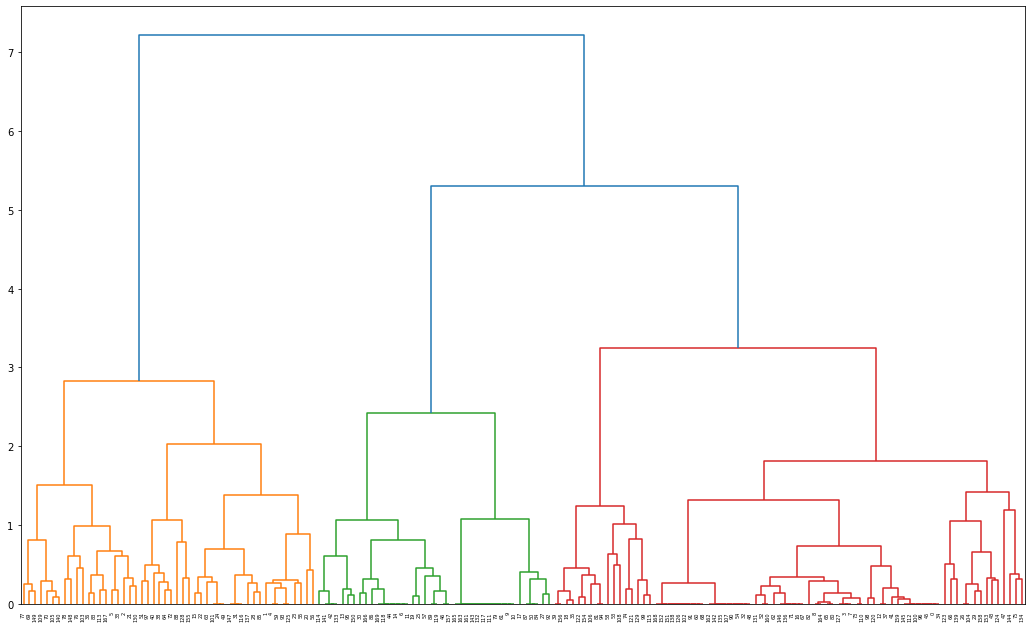

In [161]:
from sklearn import preprocessing
from scipy.cluster import hierarchy

q7_data = sampled_data[
    ["VegetationR", "UseR", "FishingR", "RoadDistanceR", "BuildingR", "RoadDistanceR", "PollutionR"]]

q7_data_scaled = preprocessing.normalize(q7_data)
q7_data_processed = pd.DataFrame(q7_data_scaled, columns=q7_data.columns)
plt.figure(figsize=(18, 11))

Z = hierarchy.linkage(q7_data_processed, 'ward')
dn = hierarchy.dendrogram(Z)
plt.show()

(b) What does the vertical and horizontal axis show in the dendogram? Why the distance between the clusters in the dendogram generally decreases, when we go from top to down in the dendogram?

<font color="green">
Solution:

* The vertical aixs shows a measure of dissimilarity of either individual data points or clusters.
* The horizontal axis names all instances and has no numerical interpretation.

The algorithm that produced the clusters is a greedy algortihm working from the bottom of the diagram to the top. Therefore, as it has no problems finding similar instances / clusters in the beginning, the clusters at the bottom are close together. The more steps the algorithm makes though, the more heterogeneous / dissimilar clusters become. It is thus less and less easy for the algorithm to find a pair of clusters that increases the dissimilarity measure as little as it did in the beginning, which means that clusters generated later by the algorithm, i.e. thus at the top, will generally have a larger distance between them.
</font>

(c) Split the diagram at 3 and find the number the clusters at this point.

The number of the clusters at 3: 4


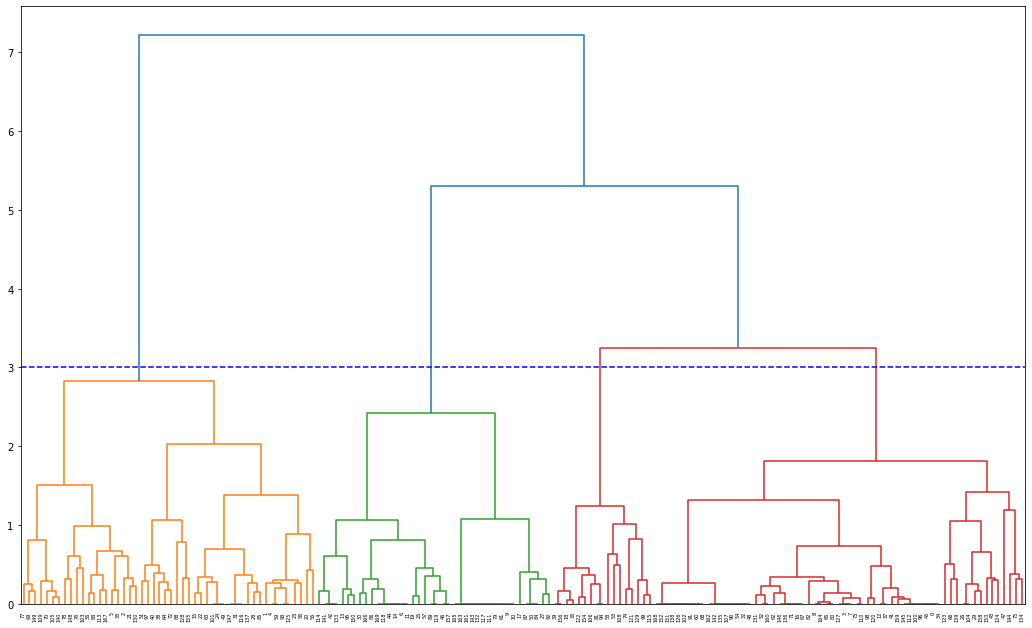

In [125]:
plt.figure(figsize=(18, 11))
Z = hierarchy.linkage(q7_data_processed, 'ward')
dn = hierarchy.dendrogram(Z)
plt.axhline(y=3, color='b', linestyle='--')
plt.show()

print('The number of the clusters at 3:', max(hierarchy.fcluster(Z, 3, 'distance')))

(d) Using agglomerative clustering with the number of clusters found in the previous section and a scatter diagram, show the discovered cluster for "VegetationR" and "UseR" in different colors. 

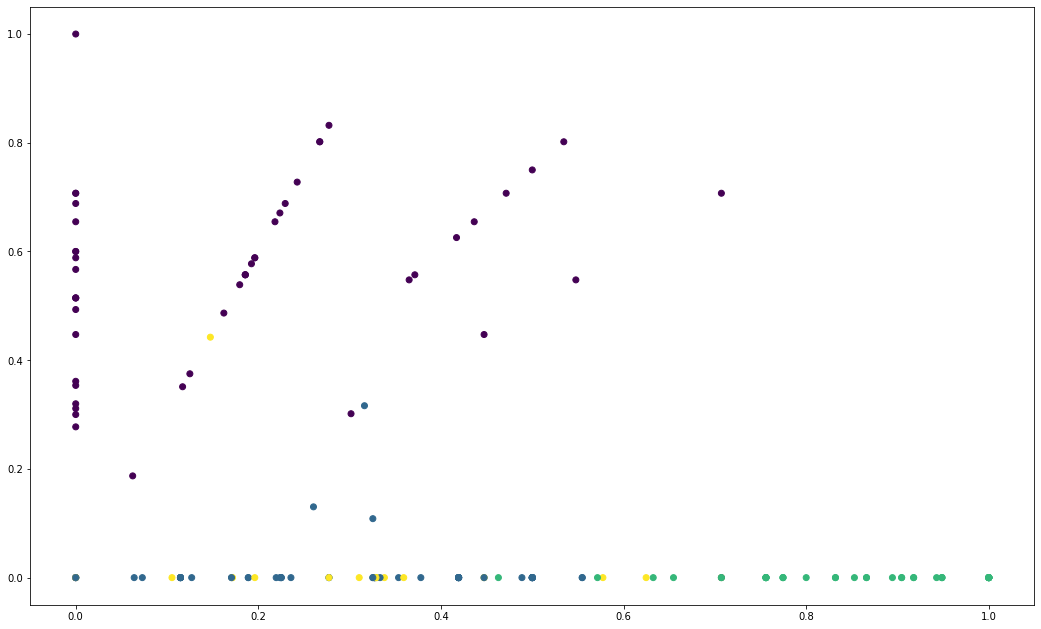

In [164]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(q7_data_processed)

plt.figure(figsize=(18, 11))
plt.scatter(q7_data_processed['VegetationR'], q7_data_processed['UseR'], c=cluster.labels_)
plt.show()